### Implementing simple Chatbot Using LangGraph

In [ ]:
from typing_extensions import TypedDict 

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [ ]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")



In [ ]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_83554c687e', 'id': 'chatcmpl-CkaI9i9iSPELYWJsp33t7AHPHvoZy', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--04486e98-6893-4dd6-9a48-28bc11dff5f3-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

### We Will start With Creating Nodes

In [14]:
def superbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

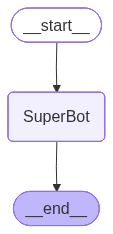

In [15]:
graph=StateGraph(State)

## node
graph.add_node("SuperBot",superbot)
## Edges

graph.add_edge(START,"SuperBot")
graph.add_edge("SuperBot",END)


graph_builder=graph.compile()


## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [16]:
## Invocation

graph_builder.invoke({'messages':"Hi,iam reddy"})

{'messages': [HumanMessage(content='Hi,iam reddy', additional_kwargs={}, response_metadata={}, id='01e65855-be81-42ca-a745-6ae19c17b1b0'),
  AIMessage(content='Hello Reddy! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 12, 'total_tokens': 23, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_83554c687e', 'id': 'chatcmpl-CkaLnwCeUIAFp4G2VTQLeTaae1IYZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--056d72f4-ab89-4763-a9d1-79a050d7d35a-0', usage_metadata={'input_tokens': 12, 'output_tokens': 11, 'total_tokens': 23, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning'

#### Streaming The responses

In [17]:
for event in graph_builder.stream({"messages":"hey wahtsapp"}):
    print(event)

{'SuperBot': {'messages': [AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 12, 'total_tokens': 21, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_83554c687e', 'id': 'chatcmpl-CkaLvijd8X71XC7FpUo2anRKwCbR4', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--17877e45-eab4-4860-9d6b-c6663773e725-0', usage_metadata={'input_tokens': 12, 'output_tokens': 9, 'total_tokens': 21, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}
